In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cargar datos
data_path = '/Users/luissalamanca/Desktop/Duoc/Machine/ML_Proyecto_Semestral/data/03_features/engineered_data.csv'
data = pd.read_csv(data_path, sep=';')

# Separar columnas concatenadas
if len(data.columns) == 1:
    column_name = data.columns[0]
    if ',' in column_name:
        new_columns = column_name.split(',')
        data_split = data[column_name].str.split(',', expand=True)
        data_split.columns = new_columns
        for col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')
        data = data_split

# Lista de features y target
features = [
    'EconomicEfficiency',
    'EffectivenessScore',
    'EquipmentAdvantage',
    'KillAssistRatio',
    'StealthKillsRatio'
]
X = data[features]
y = data['KDA']

# Dividir en entrenamiento/prueba (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
# 1) Calcular correlaciones absolutas entre cada feature y el target, usando SOLO el set de entrenamiento
corr_abs = X_train.corrwith(y_train).abs().sort_values(ascending=False)
best_feature = corr_abs.index[0]

print(f"Característica más correlacionada con KDA: {best_feature}")
print(f"Correlación absoluta: {corr_abs.iloc[0]:.4f}\n")

# 2) Definir X_simple y X_simple_test usando la feature seleccionada (sin escalar, para este caso)
X_simple = X_train[[best_feature]]
X_simple_test = X_test[[best_feature]]

# 3) Entrenar modelo de regresión lineal simple
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_train)

# 4) Predicción sobre el set de prueba
y_pred_simple = modelo_simple.predict(X_simple_test)

# 5) Calcular métricas
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)

# 6) Mostrar resultados
print("=== REGRESIÓN LINEAL SIMPLE ===")
print(f"Característica utilizada: {best_feature}")
print(f"Coeficiente: {modelo_simple.coef_[0]:.4f}")
print(f"Intercepto: {modelo_simple.intercept_:.4f}")
print(f"R² (Coef. determinación): {r2_simple:.4f}")
print(f"MSE:  {mse_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")
print(f"MAE:  {mae_simple:.4f}")

Característica más correlacionada con KDA: EffectivenessScore
Correlación absoluta: 0.9350

=== REGRESIÓN LINEAL SIMPLE ===
Característica utilizada: EffectivenessScore
Coeficiente: 0.4425
Intercepto: -0.0192
R² (Coef. determinación): 0.8784
MSE:  0.0886
RMSE: 0.2977
MAE:  0.1851


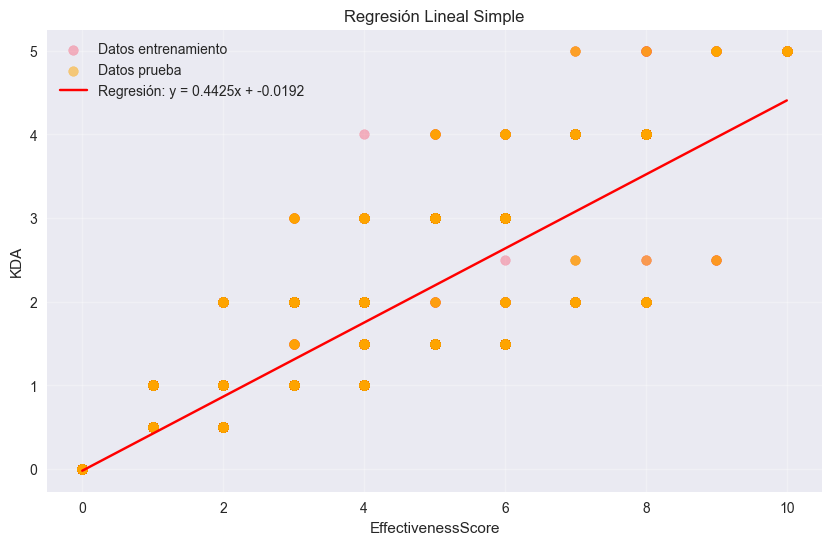

In [12]:
import matplotlib.pyplot as plt

# Crear gráfico de la regresión lineal simple
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_train, alpha=0.5, label='Datos entrenamiento')
plt.scatter(X_simple_test, y_test, alpha=0.5, label='Datos prueba', color='orange')

# Línea de regresión
x_range = np.linspace(X_simple.min(), X_simple.max(), 100).reshape(-1, 1)
y_range = modelo_simple.predict(x_range)
plt.plot(x_range, y_range, 'r-', label=f'Regresión: y = {modelo_simple.coef_[0]:.4f}x + {modelo_simple.intercept_:.4f}')

plt.xlabel(best_feature)
plt.ylabel('KDA')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
# Preparar datos para regresión lineal simple
# Usaremos solo una variable predictora (área total)
features = ['EconomicEfficiency', 'EffectivenessScore', 'EquipmentAdvantage', 'KillAssistRatio', 'StealthKillsRatio']
X = data[features]
y = data['KDA']   # Variable dependiente

print(f"Variable independiente: {X.shape}")
print(f"Variable dependiente: {y.shape}")

Variable independiente: (78744, 5)
Variable dependiente: (78744,)


In [5]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (62995, 5)
Datos de prueba: (15749, 5)


In [6]:
# Crear y entrenar el modelo de regresión lineal simple
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

print("Modelo entrenado exitosamente")
print(f"Coeficiente (pendiente): {modelo_lineal.coef_[0]:.2f}")
print(f"Intercepto: {modelo_lineal.intercept_:.2f}")

Modelo entrenado exitosamente
Coeficiente (pendiente): -0.60
Intercepto: -0.02


In [7]:
# Realizar predicciones
y_pred_train = modelo_lineal.predict(X_train)
y_pred_test = modelo_lineal.predict(X_test)

print("Predicciones realizadas")

Predicciones realizadas


In [8]:
# Evaluación del modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("=== EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE ===")
print(f"MSE Entrenamiento: {mse_train:,.2f}")
print(f"MSE Prueba: {mse_test:,.2f}")
print(f"R² Entrenamiento: {r2_train:.4f}")
print(f"R² Prueba: {r2_test:.4f}")
print(f"MAE Entrenamiento: {mae_train:,.2f}")
print(f"MAE Prueba: {mae_test:,.2f}")

=== EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE ===
MSE Entrenamiento: 0.09
MSE Prueba: 0.08
R² Entrenamiento: 0.8807
R² Prueba: 0.8853
MAE Entrenamiento: 0.19
MAE Prueba: 0.19


ValueError: x and y must be the same size

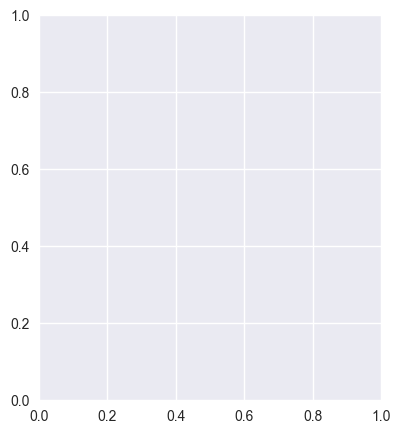

In [9]:
# Visualización de la regresión lineal
plt.figure(figsize=(15, 5))

# Gráfico 1: Línea de regresión
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.5, label='Datos de entrenamiento')
plt.scatter(X_test, y_test, alpha=0.5, color='red', label='Datos de prueba')
plt.plot(X_train, y_pred_train, color='black', linewidth=2, label='Línea de regresión')
plt.xlabel('Área de Vida (sq ft)')
plt.ylabel('Precio de Venta ($)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Valores reales vs predichos
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)

# Gráfico 3: Residuos
plt.subplot(1, 3, 3)
residuos = y_test - y_pred_test
plt.scatter(y_pred_test, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Ecuación de la regresión
print("=== ECUACIÓN DE LA REGRESIÓN LINEAL SIMPLE ===")
print(f"Precio = {modelo_lineal.intercept_:.2f} + {modelo_lineal.coef_[0]:.2f} × Área")
print(f"\nInterpretación:")
print(f"- Por cada pie cuadrado adicional de área, el precio aumenta en ${modelo_lineal.coef_[0]:.2f}")
print(f"- El precio base (intercepto) es de ${modelo_lineal.intercept_:,.2f}")

# Ejemplo de predicción
area_ejemplo = 2000
precio_predicho = modelo_lineal.predict([[area_ejemplo]])[0]
print(f"\n=== EJEMPLO DE PREDICCIÓN ===")
print(f"Para una casa con {area_ejemplo} sq ft de área:")
print(f"Precio predicho: ${precio_predicho:,.2f}")